### Given Income and age identify the clusters using K-Means algorithm
- Unsupervised data need to be arranged into clusters where we find patterns or features by grouping them together
  - Use Elbow plot and silhoutte score to determine the maximum no of clusters
  - File Location: https://github.com/CoderFundamentals/python/blob/master/k-mean/data/income.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot
import sklearn.cluster as cluster
from sklearn.preprocessing import MinMaxScaler

In [2]:
housing_data = pd.read_csv('../data/income.csv')
housing_data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


#### We need to scale age and Income and also we can drop Name before we cluster data
- Drop Name column as it is text value
- Scale Age and Income


In [3]:
housing_data.drop('Name',axis='columns',inplace=True)
housing_data.head()

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


In [4]:
scaler = MinMaxScaler()
scaler.fit(housing_data[['Age','Income($)']])
housing_data[['Age','Income($)']] = scaler.transform(housing_data[['Age','Income($)']])
housing_data.head()

,Age,Income($)
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


In [5]:
KMeans = cluster.KMeans(n_clusters= 3,init='k-means++')
KMeans.fit(housing_data)

KMeans(n_clusters=3)

In [6]:
#Labels
KMeans.labels_

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [7]:
# Cluster centers
KMeans.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

In [8]:
#WSS
KMeans.inertia_

0.4750783498553097

- Lets predict WSS and plot Elbow 

In [9]:
wss = []
r = range(1,15)
for i in r:
    K_Means = cluster.KMeans(n_clusters=i, init="k-means++")
    K_Means.fit(housing_data[['Age','Income($)']])
    wss.append(K_Means.inertia_)

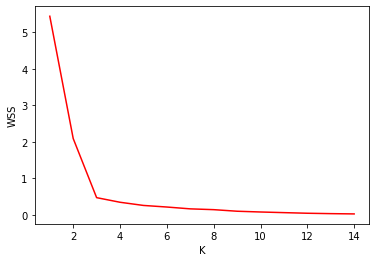

In [10]:
pyplot.xlabel("K")
pyplot.ylabel("WSS")
pyplot.plot(r, wss, color = 'red')

### From the above plot it is clear that our WSS becames flat ranging 3 till 15.To exactly measure the no of clusters we can use the silhoutte score method

In [11]:
from sklearn.metrics import silhouette_score

In [13]:
for i in range(3,15):
        kmean_label = cluster.KMeans(n_clusters=i,random_state=200).fit(housing_data).labels_
        score  = silhouette_score(housing_data,kmean_label,metric='euclidean',sample_size=10000,random_state=100)
        print("Got score {s_score} with no of clusters {n_cluster}".format(s_score = score, n_cluster = i))

Got score 0.7129710183539275 with no of clusters 3
Got score 0.625655419231276 with no of clusters 4
Got score 0.5035508225153914 with no of clusters 5
Got score 0.41066019205643656 with no of clusters 6
Got score 0.44266707319578164 with no of clusters 7
Got score 0.4005779274732536 with no of clusters 8
Got score 0.2607796352265118 with no of clusters 9
Got score 0.3022371533682111 with no of clusters 10
Got score 0.31881807238782944 with no of clusters 11
Got score 0.2931778458004961 with no of clusters 12
Got score 0.26310198553866687 with no of clusters 13
Got score 0.2286678819227345 with no of clusters 14
